Solution heavily influenced on https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe

In [1]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('happiness_score_dataset.csv')

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df['Country'].nunique()

158

In [7]:
df.shape

(158, 12)

<AxesSubplot:>

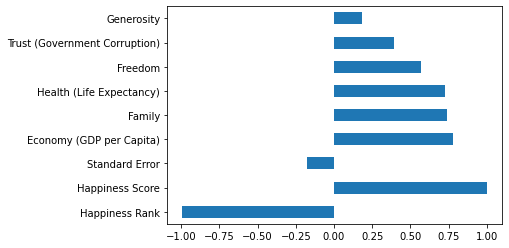

In [8]:
df.corr().loc['Happiness Score'][:-1].plot.barh()

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Happiness Spread'}, ylabel='Happiness Score'>

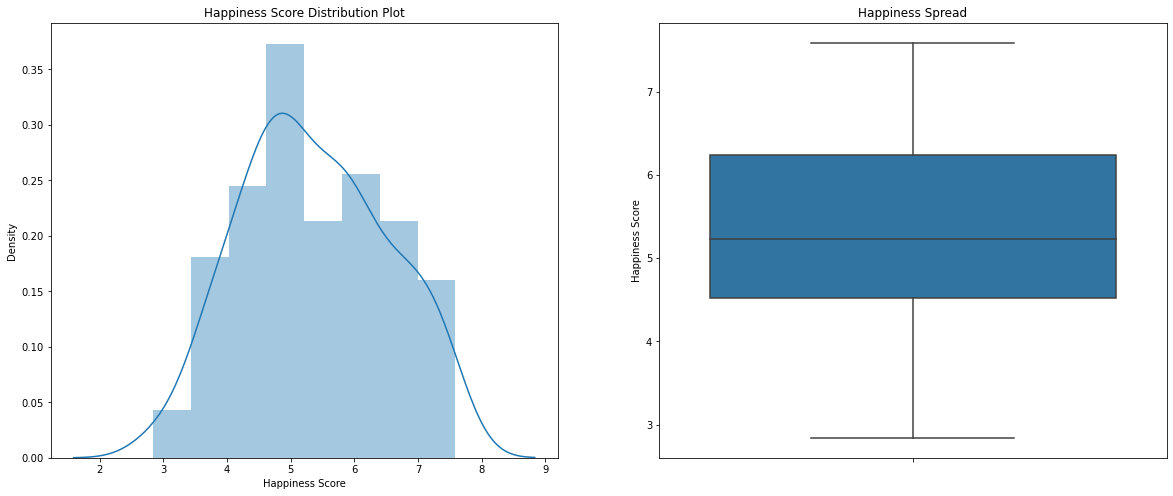

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Happiness Score Distribution Plot')
sns.distplot(df['Happiness Score'])

plt.subplot(1,2,2)
plt.title('Happiness Spread')
sns.boxplot(y=df['Happiness Score'])

<AxesSubplot:title={'center':'REgion vs Happiness Score'}, xlabel='Region', ylabel='Happiness Score'>

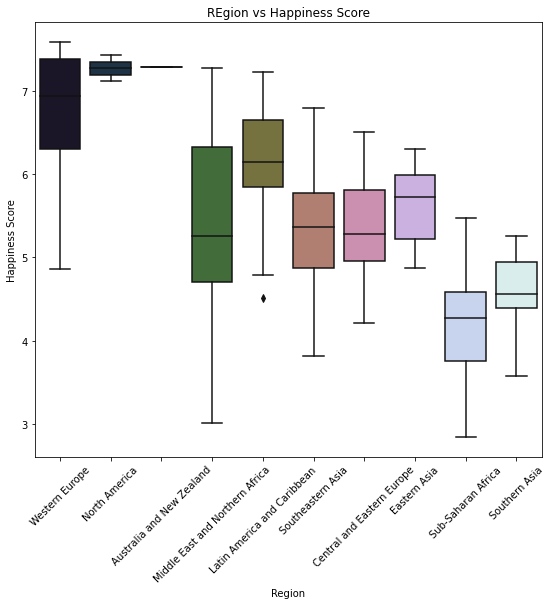

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,2)
plt.title('REgion vs Happiness Score')
plt.xticks(rotation=45)
sns.boxplot(x=df['Region'], y=df['Happiness Score'], palette=("cubehelix"))

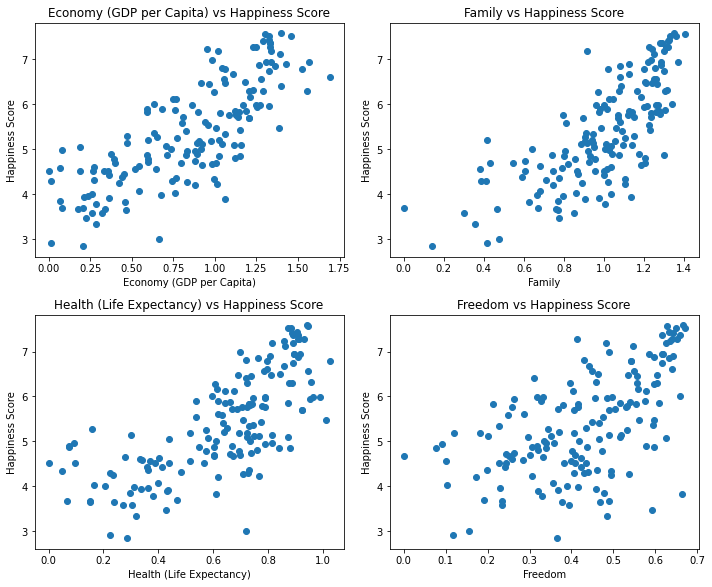

In [22]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Happiness Score'])
    plt.title(x+' vs Happiness Score')
    plt.ylabel('Happiness Score')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Economy (GDP per Capita)', 1)
scatter('Family', 2)
scatter('Health (Life Expectancy)', 3)
scatter('Freedom', 4)

plt.tight_layout()

In [30]:
df_lr = df[['Happiness Score', 'Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom']]
df_lr.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom
0,7.587,1.39651,1.34951,0.94143,0.66557
1,7.561,1.30232,1.40223,0.94784,0.62877
2,7.527,1.32548,1.36058,0.87464,0.64938
3,7.522,1.45900,1.33095,0.88521,0.66973
4,7.427,1.32629,1.32261,0.90563,0.63297


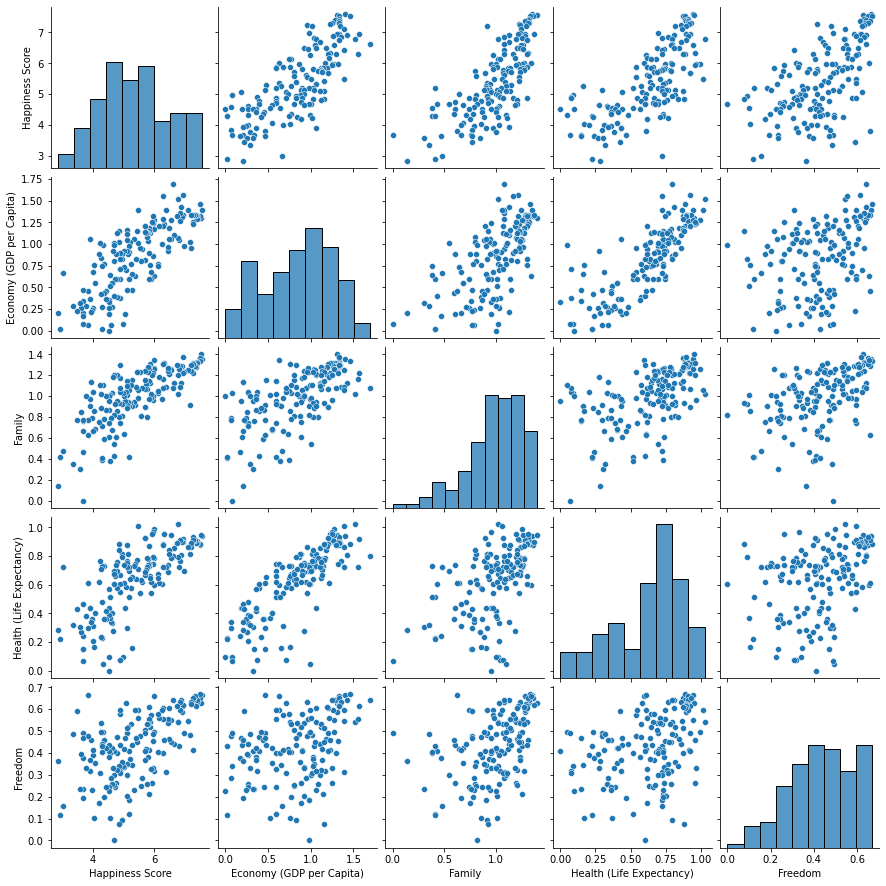

In [31]:
sns.pairplot(df_lr)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom', 'Happiness Score']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom
6,0.955361,0.784505,0.916269,0.870851,0.919415
25,0.821230,0.783598,0.934270,0.869895,0.917937
21,0.843229,0.802814,0.730309,0.743975,0.944769
75,0.518368,0.624242,0.603274,0.713699,0.340660
84,0.475011,0.271670,0.574960,0.291870,0.729055


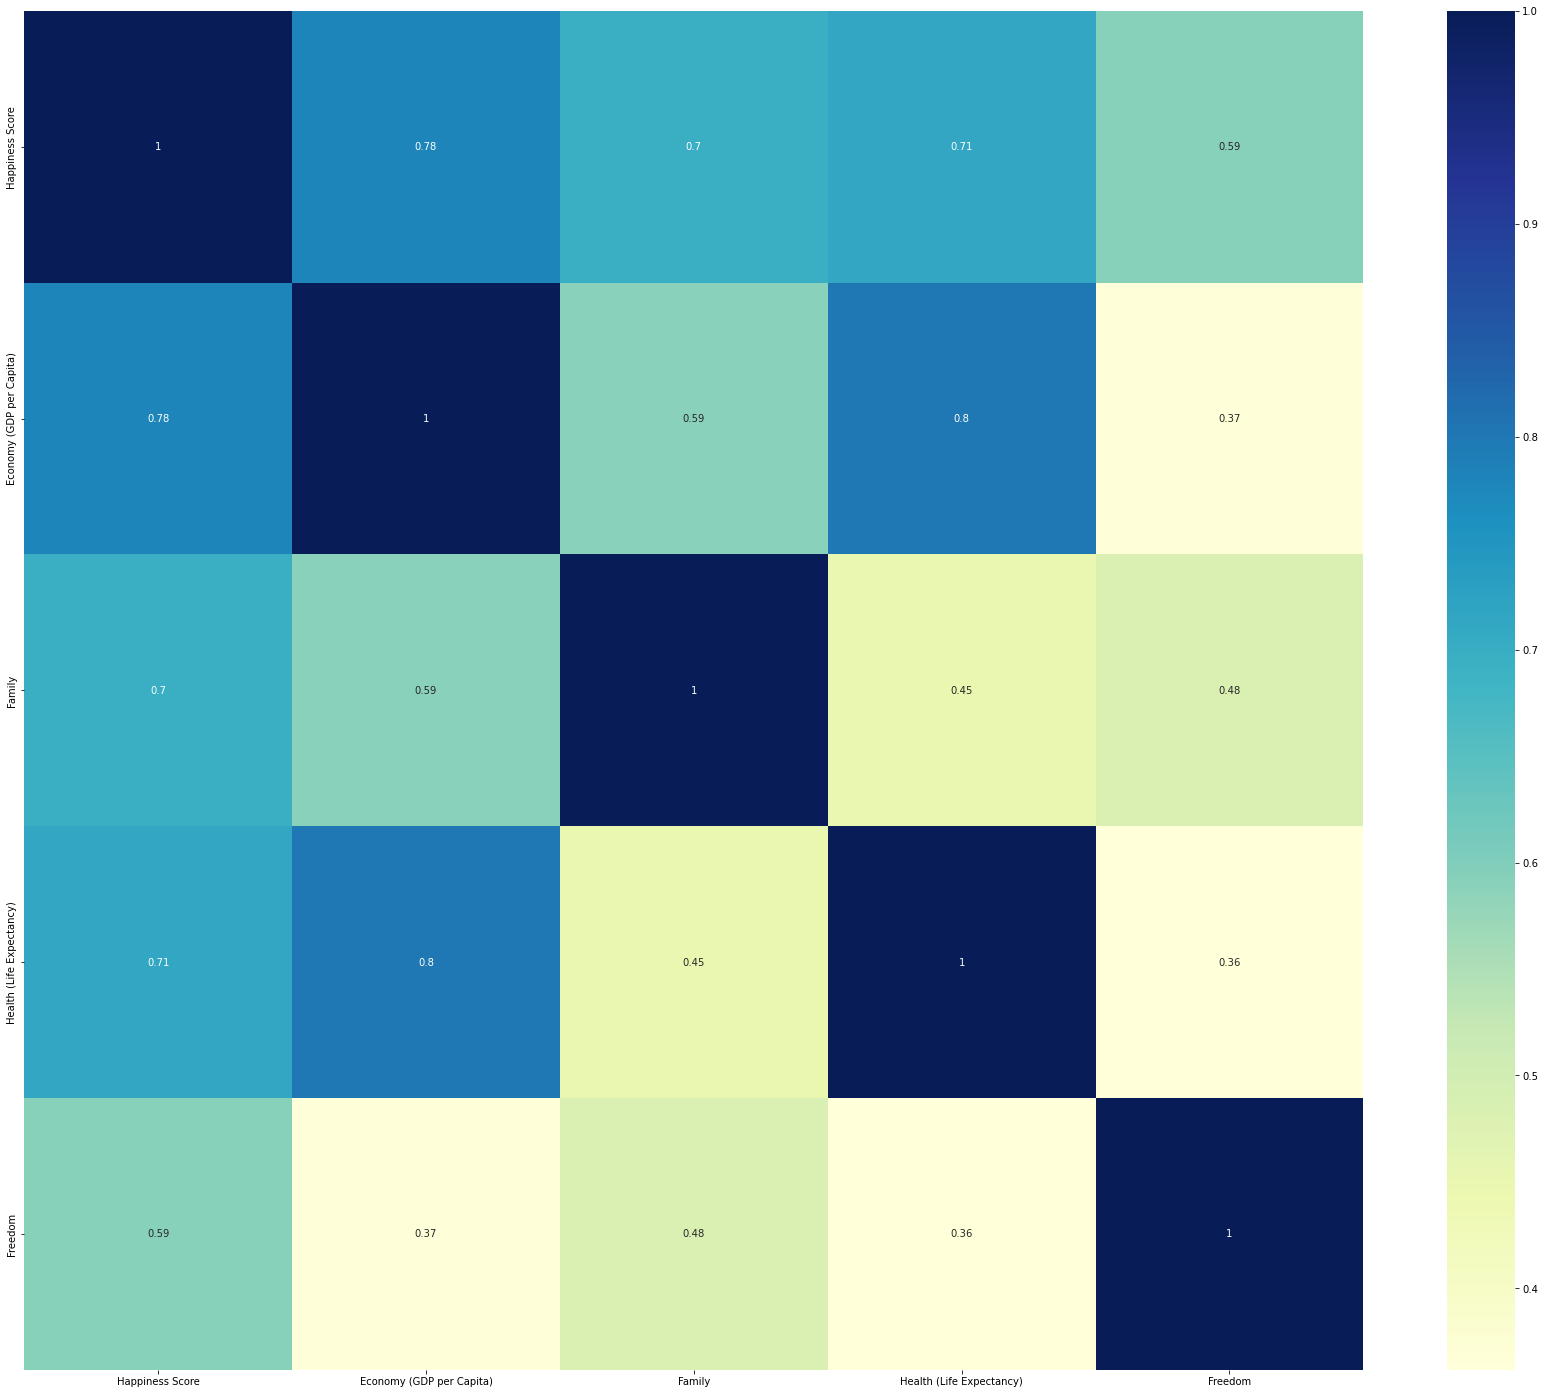

In [35]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [37]:
#Dividing data into X and y variables
y_train = df_train.pop('Happiness Score')
X_train = df_train

In [38]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Economy (GDP per Capita)', True, 1),
 ('Family', False, 2),
 ('Health (Life Expectancy)', False, 3),
 ('Freedom', True, 1)]

In [42]:
X_train.columns[rfe.support_]

Index(['Economy (GDP per Capita)', 'Freedom'], dtype='object')

In [43]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,Economy (GDP per Capita),Freedom
6,0.784505,0.919415
25,0.783598,0.917937
21,0.802814,0.944769
75,0.624242,0.340660
84,0.271670,0.729055


In [44]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [45]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     135.1
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           5.35e-30
Time:                        08:10:45   Log-Likelihood:                 69.186
No. Observations:                 110   AIC:                            -132.4
Df Residuals:                     107   BIC:                            -124.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     135.1
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           5.35e-30
Time:                        08:13:27   Log-Likelihood:                 69.186
No. Observations:                 110   AIC:                            -132.4
Df Residuals:                     107   BIC:                            -124.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
